# Regresión Lineal: Coste de un incidente de seguridad

## Enunciado del ejercicio

El ejercicio consiste en predecir el coste de un incidente de seguridad en base al número de equipos que se han visto afectados. El conjunto de datos es generado de manera aleatoria.

### Generación de Conjunto de Datos

In [3]:
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

print("La longitud del conjunto de datos es:", len(X))

La longitud del conjunto de datos es: 100


### Visualización del Conjunto


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

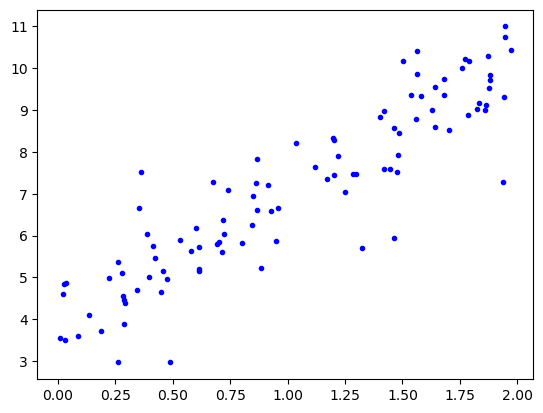

In [26]:
plt.plot(X, y, "b.")
plt.show()

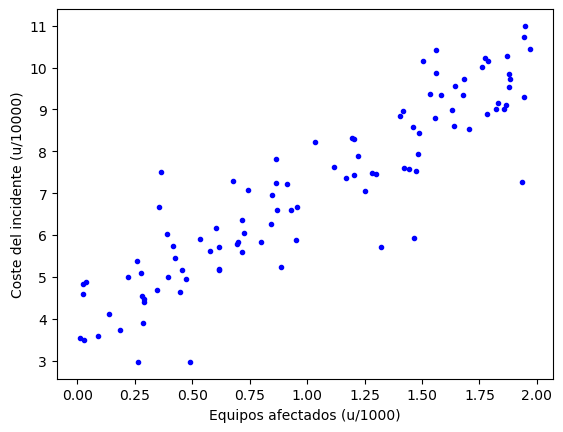

In [27]:
plt.plot(X, y, "b.")
plt.xlabel("Equipos afectados (u/1000)")
plt.ylabel("Coste del incidente (u/10000)")
plt.show()

### Modificación del Conjunto de Datos

In [28]:
import pandas as pd

In [29]:
data = {'n_equipos_afectados': X.flatten(), 'coste': y.flatten()}
df = pd.DataFrame(data)
df.head(10)

,n_equipos_afectados,coste
0,0.614566,5.195526
1,0.089014,3.595575
2,0.602064,6.173404
3,1.443803,7.578989
4,0.282460,4.548994
5,0.843023,6.257222
6,1.297575,7.467175
7,0.222059,4.997361
8,0.009095,3.546838
9,1.461066,8.579380


In [30]:
# Escalado del número de equipos afectados
df['n_equipos_afectados'] = df['n_equipos_afectados'] * 1000
df['n_equipos_afectados'] = df['n_equipos_afectados'].astype('int')
# Escalado del coste
df['coste'] = df['coste'] * 10000
df['coste'] = df['coste'].astype('int')
df.head(10)

,n_equipos_afectados,coste
0,614,51955
1,89,35955
2,602,61734
3,1443,75789
4,282,45489
5,843,62572
6,1297,74671
7,222,49973
8,9,35468
9,1461,85793


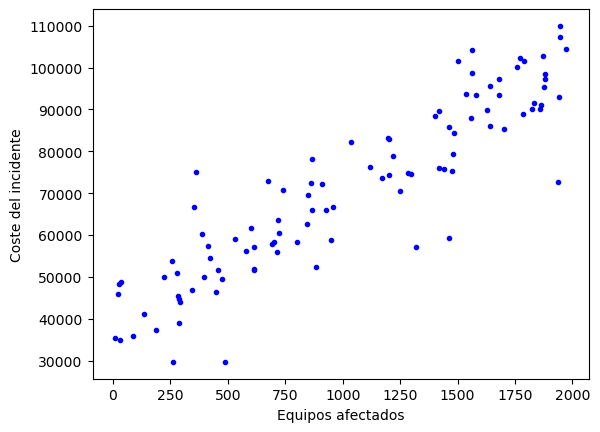

In [31]:
# Representación gráfica del conjunto de datos
plt.plot(df['n_equipos_afectados'], df['coste'], "b.")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()

### Construcción del Modelo

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
# Construcción del modelo y ajuste de la función hipótesis
lin_reg = LinearRegression()
lin_reg.fit(df['n_equipos_afectados'].values.reshape(-1, 1), df['coste'].values)

LinearRegression()

In [34]:
# Parámetro theta 0
lin_reg.intercept_

39126.14211906382

In [35]:
 Parámetro theta 1
lin_reg.coef_

SyntaxError: invalid syntax (990455831.py, line 1)

In [36]:
# Predicción para el valor mínimo y máximo del conjunto de datos de entrenamiento
X_min_max = np.array([[df["n_equipos_afectados"].min()], [df["n_equipos_afectados"].max()]])
y_train_pred = lin_reg.predict(X_min_max)

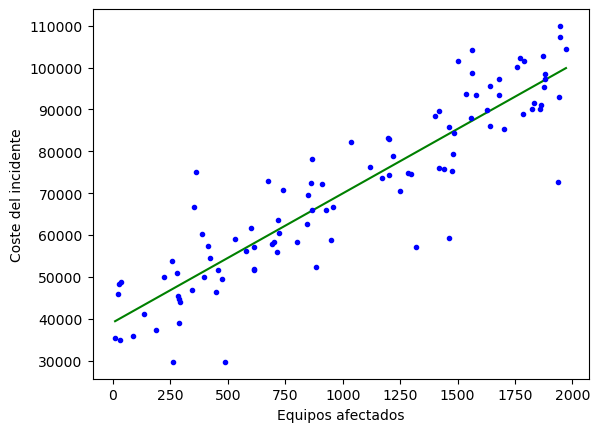

In [37]:
# Representación gráfica de la función hipótesis generada
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(df['n_equipos_afectados'], df['coste'], "b.")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()

### Predicciones de Nuevos Ejemplos

In [39]:
x_new = np.array([[1300]]) # 1300 equipos afectados

# Predicción del coste que tendría el incidente
coste = lin_reg.predict(x_new) 

print("El coste del incidente sería:", int(coste[0]), "$")

El coste del incidente sería: 79170 $


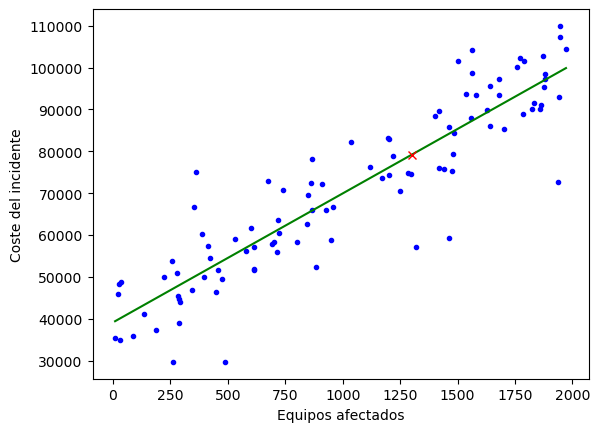

In [40]:
plt.plot(df['n_equipos_afectados'], df['coste'], "b.")
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(x_new, coste, "rx")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()